In [1]:
import polars as pl

In [2]:
# reading processed parquet file
df = pl.read_parquet('2022_place_canvas_simplified.parquet')

In [3]:
df.head() 

timestamp,user_id,pixel_color,coordinate,x,y
datetime[μs],str,str,str,i32,i32
2022-04-01 12:44:10,"""bEVqcmVtQ3ROb1Fh""","""#7EED56""","""42,42""",42,42
2022-04-01 12:44:22,"""RWljaWk2NHF1V2dB""","""#00A368""","""999,999""",999,999
2022-04-01 12:44:26,"""bmthdWdKcjlqOVlu""","""#3690EA""","""44,42""",44,42
2022-04-01 12:44:31,"""akhZcFFXMEovb21R""","""#D4D7D9""","""2,2""",2,2
2022-04-01 12:44:44,"""NG5kcHNDMU9FS2xP""","""#3690EA""","""23,23""",23,23


In [4]:
# for memory purposes
df = df.drop('coordinate')

In [ ]:
# seeing top 3
df.group_by(['x', 'y']).agg(pl.count().alias('count')).sort('count', descending=True).head(3)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\2597815527.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  df.group_by(['x', 'y']).agg(pl.count().alias('count')).sort('count', descending=True).head(3)


x,y,count
i32,i32,u32
0,0,98807
359,564,69198
349,564,55230


In [6]:
# left eye color counts 
left_eye = df.filter((pl.col('x')==349) & (pl.col('y')==564)).group_by('pixel_color').agg(pl.count().alias('count')).sort('count',descending=True)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\3333095125.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  left_eye = df.filter((pl.col('x')==349) & (pl.col('y')==564)).group_by('pixel_color').agg(pl.count().alias('count')).sort('count',descending=True)


In [7]:
left_eye = left_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\2373522717.py:1: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("count").map_elements(lambda x: ...)
with this one instead:
  + pl.col("count") + '%'

  left_eye = left_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)
C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\2373522717.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  left_eye = left_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)


In [ ]:
# right eye color counts 
right_eye = df.filter((pl.col('x')==359) & (pl.col('y')==564)).group_by('pixel_color').agg(pl.count().alias('count')).sort('count',descending=True)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\1112004302.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  right_eye = df.filter((pl.col('x')==359) & (pl.col('y')==564)).group_by('pixel_color').agg(pl.count().alias('count')).sort('count',descending=True)


In [9]:
right_eye = right_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\2903755519.py:1: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("count").map_elements(lambda x: ...)
with this one instead:
  + pl.col("count") + '%'

  right_eye = right_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)
C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\2903755519.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  right_eye = right_eye.with_columns((pl.col("count") / pl.col("count").sum() * 100).round(2).cast(pl.Utf8).map_elements(lambda x: x + "%").alias("proportion")).head(5)


In [10]:
import plotnine as pn

In [11]:
# plotting canonical order 
left_eye = left_eye.with_columns(pl.col("pixel_color").cast(pl.Categorical))
right_eye = right_eye.with_columns(pl.col("pixel_color").cast(pl.Categorical))

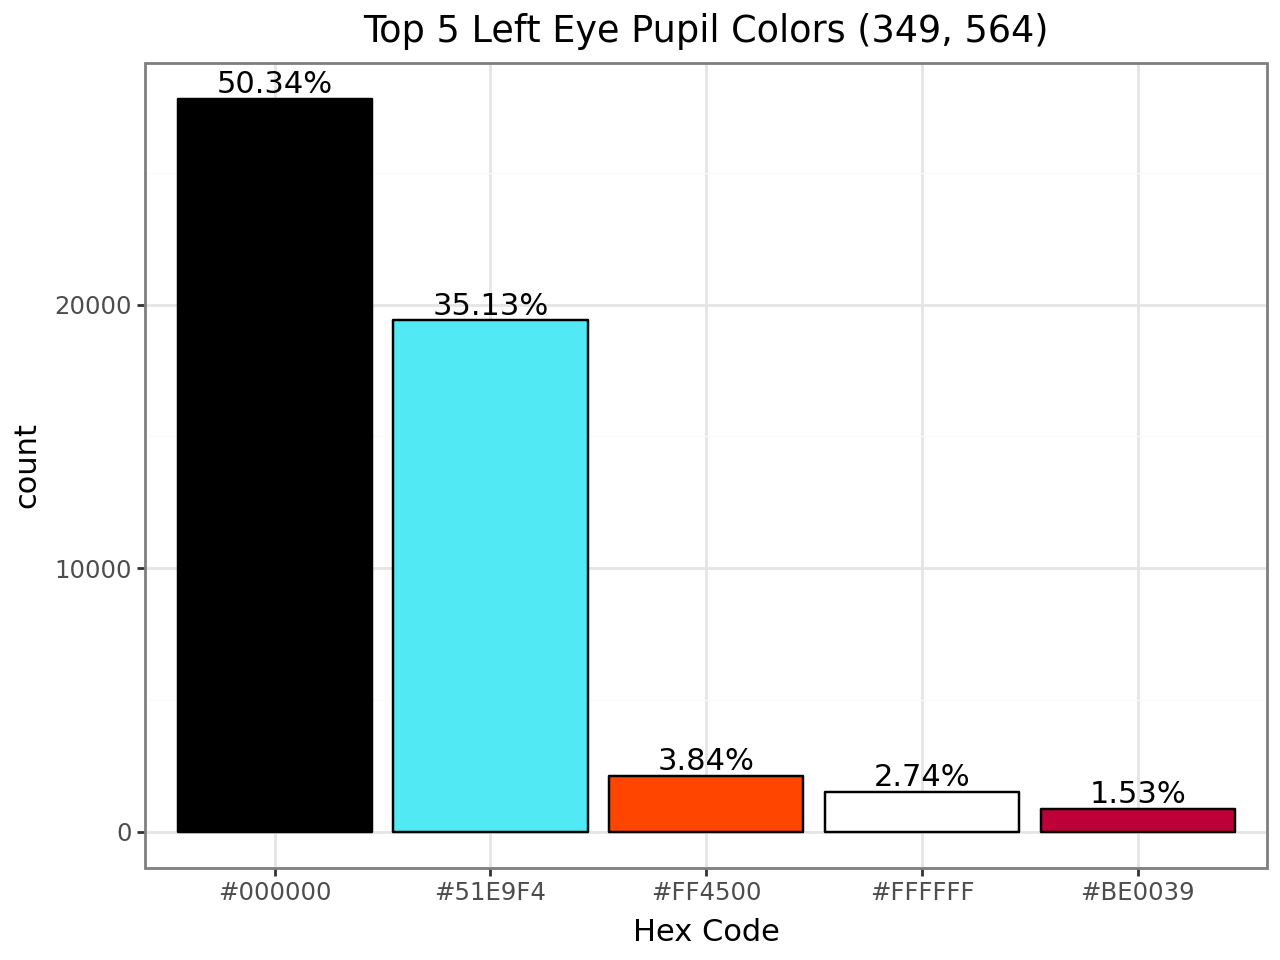

In [ ]:
# top 5 left eye colors 
(
    pn.ggplot(left_eye, pn.aes('pixel_color', 'count', fill='pixel_color'))
    + pn.geom_bar(stat='identity', color='black')
    + pn.geom_text(pn.aes(label='proportion'), nudge_y=-5, va='bottom')
    + pn.scale_fill_manual(values=dict(zip(left_eye['pixel_color'], left_eye['pixel_color']))) 
    + pn.theme_bw()
    + pn.labs(title='Top 5 Left Eye Pupil Colors (349, 564)', x='Hex Code')
    + pn.theme(legend_position='none')

)

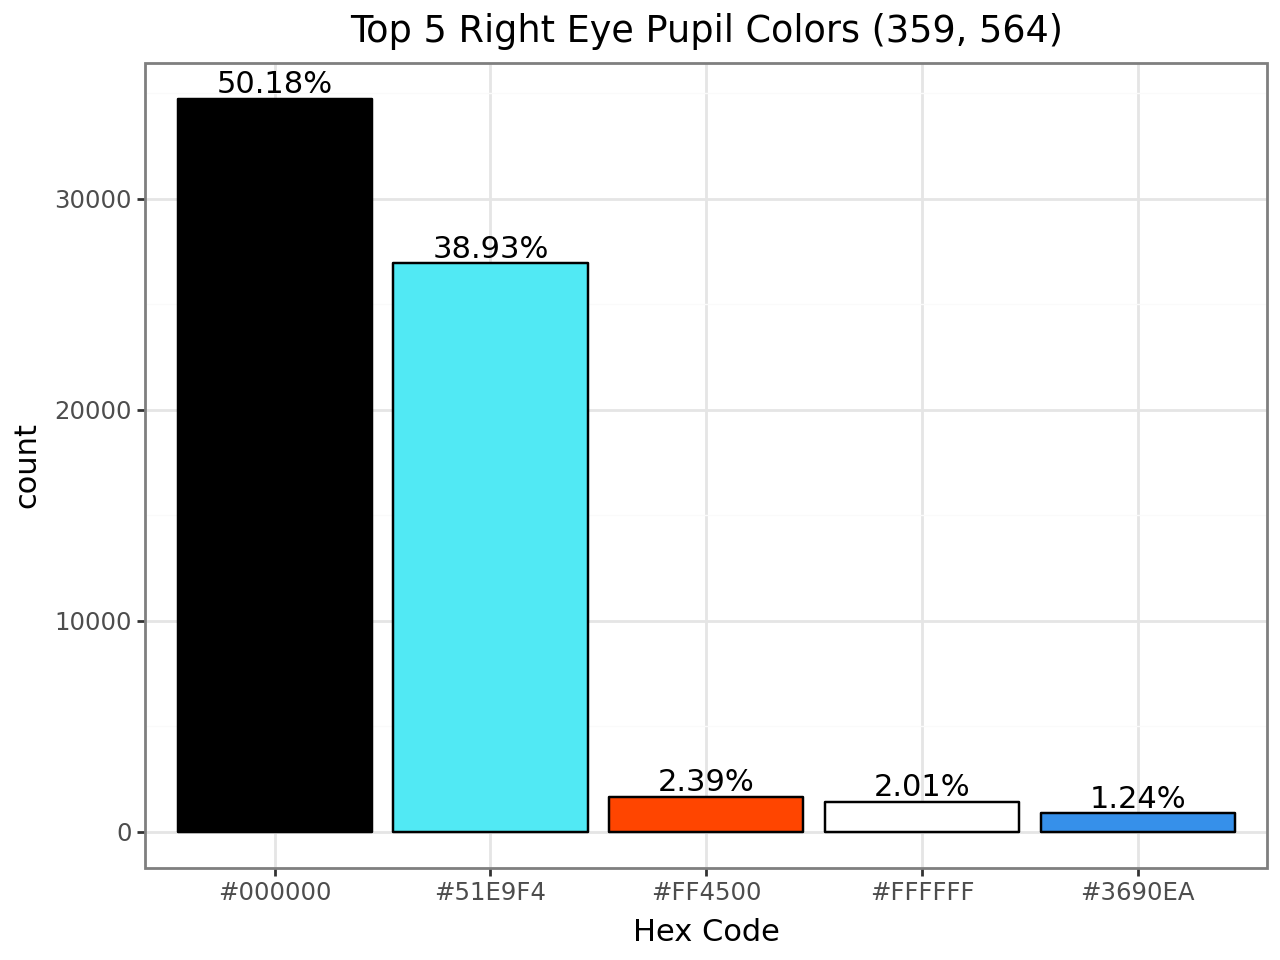

In [13]:
# top 5 right eye colors 
(
    pn.ggplot(right_eye, pn.aes('pixel_color', 'count', fill='pixel_color'))
    + pn.geom_bar(stat='identity', color='black')
    + pn.geom_text(pn.aes(label='proportion'), nudge_y=-5, va='bottom')
    + pn.scale_fill_manual(values=dict(zip(right_eye['pixel_color'], right_eye['pixel_color']))) 
    + pn.theme_bw()
    + pn.labs(title='Top 5 Right Eye Pupil Colors (359, 564)', x='Hex Code')
    + pn.theme(legend_position='none')

)

In [37]:
# more analysis on right eye, since sans blue eye is his right one
# getting lagged colors to see transitions 
right_only = df.filter((pl.col('x')==359) & (pl.col('y')==564)).with_columns(pl.col('pixel_color').shift(1).alias('last_color'))

In [38]:
# grouping switches 
right_only=right_only.with_columns(
    pl.when((pl.col("pixel_color") == "#51E9F4") & (pl.col("last_color") == "#000000"))
    .then(pl.lit("black to blue"))
    .when((pl.col("pixel_color") == "#000000") & (pl.col("last_color") == "#51E9F4"))
    .then(pl.lit("blue to black"))
    .when((pl.col("pixel_color") == "#000000") & (pl.col("last_color") == "#000000"))
    .then(pl.lit("black to black"))
    .when((pl.col("pixel_color") == "#51E9F4") & (pl.col("last_color") == "#51E9F4"))
    .then(pl.lit("blue to blue"))
    .otherwise(pl.lit("literally everything else"))
    .alias("transition")
)

In [39]:
# getting counts 
right_changes = right_only.group_by('transition').agg(pl.count().alias('count')).sort('count',descending=True)

C:\Users\Brandon Kim\AppData\Local\Temp\ipykernel_1980\3904214707.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.


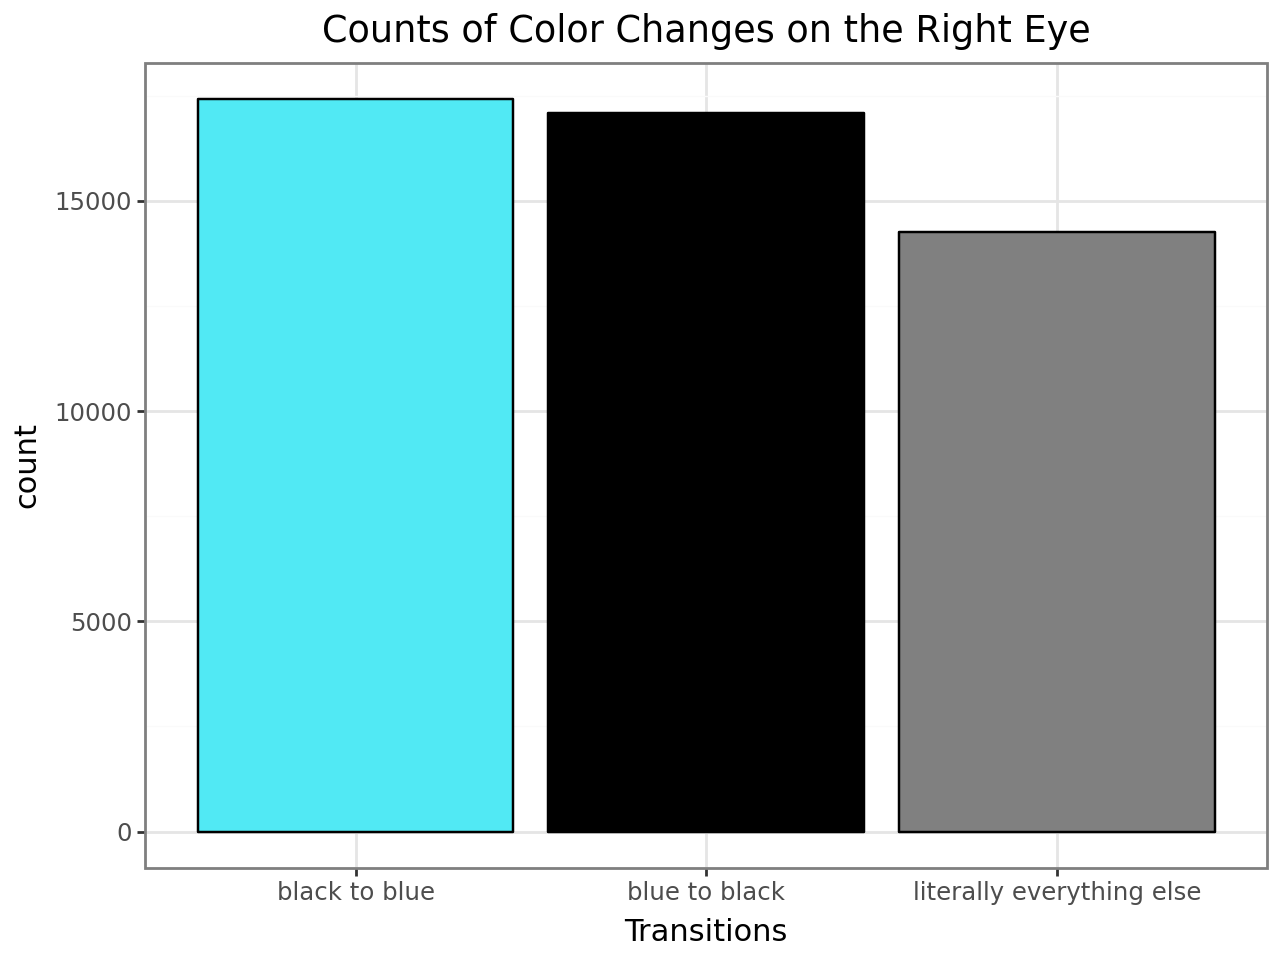

In [42]:
# visualizing counts of transitions 
(
    pn.ggplot(right_changes.head(3), pn.aes('transition', 'count', fill='transition'))
    + pn.geom_bar(stat='identity', color='black')
    + pn.theme_bw() 
    + pn.scale_fill_manual(values={'black to blue': "#51E9F4", 'blue to black': '#000000', 'literally everything else': "#808080"})
    + pn.labs(title='Counts of Color Changes on the Right Eye', x='Transitions')
    + pn.theme(legend_position='none')

)

In [52]:
# getting difference in times of switches 
getdiffs = right_only.with_columns(pl.col('timestamp').shift(1).alias('last_time')).with_columns(pl.col('timestamp').sub(pl.col('last_time')).alias('diff'))

In [ ]:
# only keeping top 5 colors, all others become 'other' 
times = getdiffs.with_columns(pl.when(pl.col('pixel_color').is_in(['#000000', '#51E9F4', '#FF4500', '#FFFFFF', '#3690EA'])).then(pl.col('pixel_color')).otherwise(pl.lit('Other')).alias('hex_code')).group_by('hex_code').agg(pl.mean('diff').alias('avg_time')).sort('avg_time')

In [57]:
# for plotting in canonical order
times = times.with_columns(pl.col("hex_code").cast(pl.Categorical))

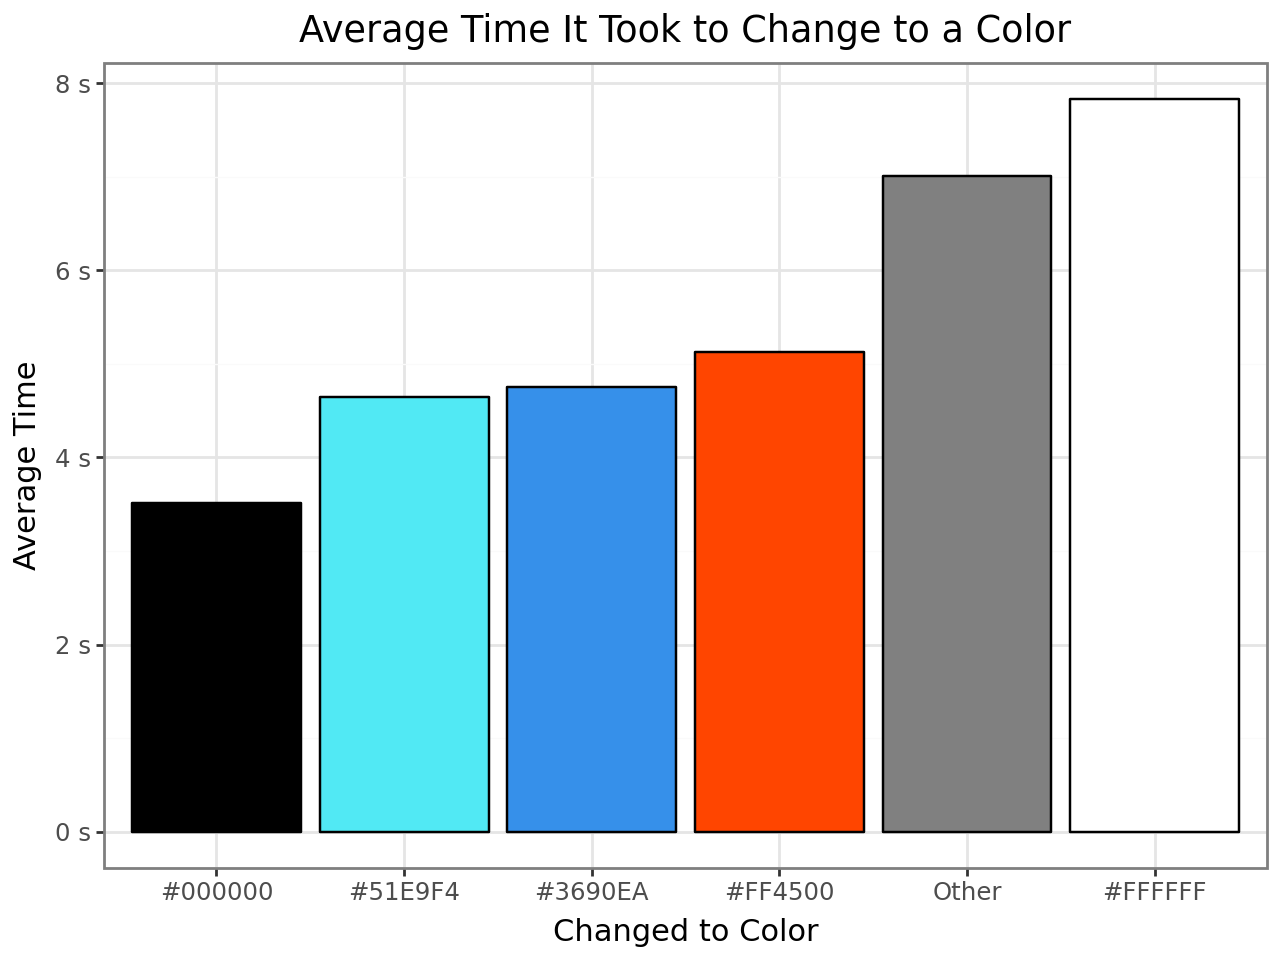

In [62]:
# visualizing time changes 
(
    pn.ggplot(times, pn.aes('hex_code', 'avg_time', fill='hex_code'))
    + pn.geom_bar(stat='identity', color='black')
    + pn.theme_bw() 
    + pn.scale_fill_manual(values={'#000000':'#000000', '#51E9F4':'#51E9F4', '#3690EA':'#3690EA', '#FF4500':'#FF4500', 'Other':"#808080", '#FFFFFF':'#FFFFFF'})
    + pn.labs(title='Average Time It Took to Change to a Color', x='Changed to Color', y='Average Time')
    + pn.theme(legend_position='none')

)